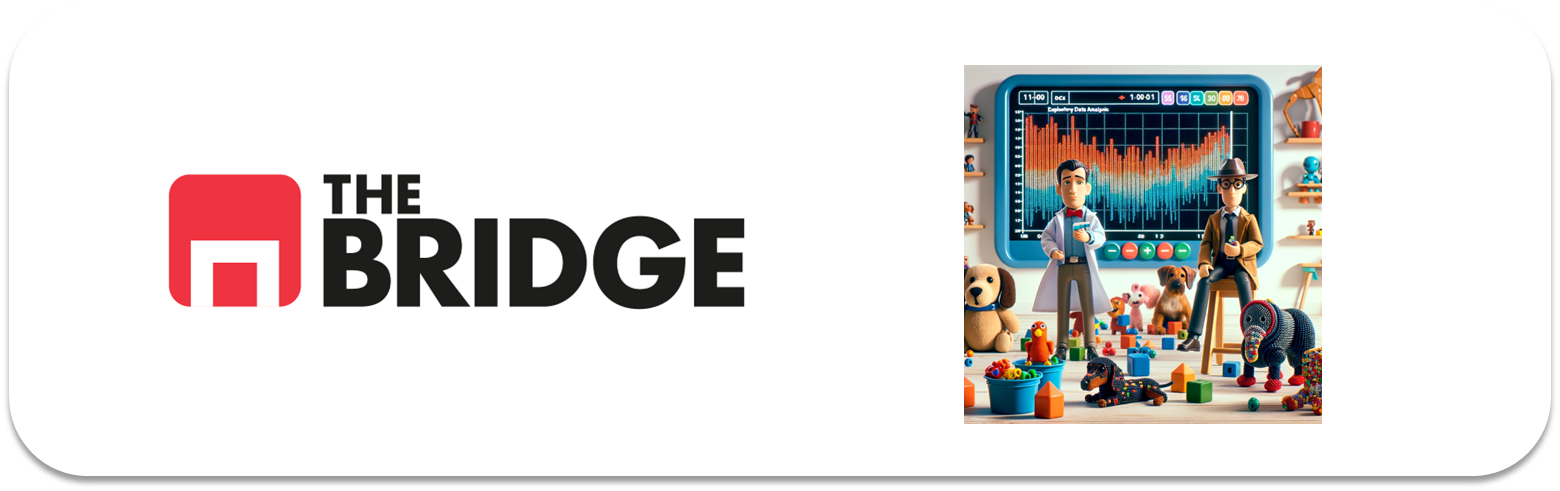

## PRACTICA OBLIGATORIA: ANÁLISIS MULTIVARIANTE

* La práctica obligatoria de esta unidad consiste en completar el análisis del dataset del Titanic, dirigido por una serie de preguntas, y de terminar de analizar algunos aspectos del dataset de viajes. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0


Importa los paquetes y módulos que necesites a lo largo del notebook

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## #1 TITANIC

### #1.1

Carga en un dataframe el dataset del titanic, que está en la ruta "./data/titanic.csv".

In [29]:
df_titanic = pd.read_csv("./data/titanic.csv")
df_titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### #1.2

Deshazte de las columnas "deck", "survived", "pclass" y "embarked" porque no las emplearemos, la primera por su cantidad de nulos y el resto porque son variantes de otras que ya existen y cuyos valores resultan más expresivos a la hora de hacer un análisis. 

In [30]:
df_titanic_1 = df_titanic.drop(columns=["deck","survived","pclass","embarked"])
df_titanic_1.head()

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True


### #1.3

Suma las columnas "parch" y "sibsp" para tener el número de parientes de cada pasajero, guarda el resultado en otra columna "family_members", luego deshazte de "parch" y "sibsp"

In [31]:
df_titanic_1["family_members"] = df_titanic_1["parch"] + df_titanic_1["sibsp"]
df_titanic_1

,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,1,0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,1,0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,0,0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,1,0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,0,0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,0,0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,0,0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,1,2,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,0,0,30.0000,First,man,True,Cherbourg,yes,True,0


In [32]:
df_titanic_1 = df_titanic_1.drop(columns=["parch","sibsp"])


In [33]:
df_titanic_1

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
0,male,22.0,7.2500,Third,man,True,Southampton,no,False,1
1,female,38.0,71.2833,First,woman,False,Cherbourg,yes,False,1
2,female,26.0,7.9250,Third,woman,False,Southampton,yes,True,0
3,female,35.0,53.1000,First,woman,False,Southampton,yes,False,1
4,male,35.0,8.0500,Third,man,True,Southampton,no,True,0
...,...,...,...,...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,True,Southampton,no,True,0
887,female,19.0,30.0000,First,woman,False,Southampton,yes,True,0
888,female,NaN,23.4500,Third,woman,False,Southampton,no,False,3
889,male,26.0,30.0000,First,man,True,Cherbourg,yes,True,0


### #1.4

Imputa la moda a los valores nulos de "embark_town"

In [ ]:
df_titanic_1['embark_town'] = df_titanic_1['embark_town'].fillna(df_titanic_1['embark_town'].mode()[0])


In [40]:
df_titanic_1['embark_town'].isna().sum()

np.int64(0)

In [41]:
df_titanic_1.sample(3)

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
232,male,59.0,13.50,Second,man,True,Southampton,no,True,0
304,male,NaN,8.05,Third,man,True,Southampton,no,True,0
450,male,36.0,27.75,Second,man,True,Southampton,no,False,3


### #1.5

Imputa la media a los valores faltantes de "age", si quieres puedes hacer algo más preciso (por ejemplo considerando además la columna "who")

In [42]:
df_titanic_1['age']= df_titanic_1['age'].fillna(df_titanic_1['age'].mean())

In [44]:
df_titanic_1.age.isna().sum()

np.int64(0)

In [45]:
df_titanic_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sex             891 non-null    object 
 1   age             891 non-null    float64
 2   fare            891 non-null    float64
 3   class           891 non-null    object 
 4   who             891 non-null    object 
 5   adult_male      891 non-null    bool   
 6   embark_town     891 non-null    object 
 7   alive           891 non-null    object 
 8   alone           891 non-null    bool   
 9   family_members  891 non-null    int64  
dtypes: bool(2), float64(2), int64(1), object(5)
memory usage: 57.6+ KB


### 1.6

Realiza los análisis bivariantes o multivariantes que necesites, así como los test de hipótesis necesarios para contestar a las siguientes preguntas. Nota: utiliza la variable "alive" para saber si un pasajero sobrevivió o no:

1. En términos absolutos, ¿sobrevivieron más hombres, mujeres o niños? ¿Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre el sexo y la supervivencia en el Titanic?¿Y entre ser adulto o ser niño?

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

#1

In [46]:
from bootcampviztools import pinta_distribucion_categoricas,plot_categorical_relationship_fin,plot_categorical_numerical_relationship,plot_combined_graphs,plot_grouped_boxplots,plot_grouped_histograms,grafico_dispersion_con_correlacion,bubble_plot

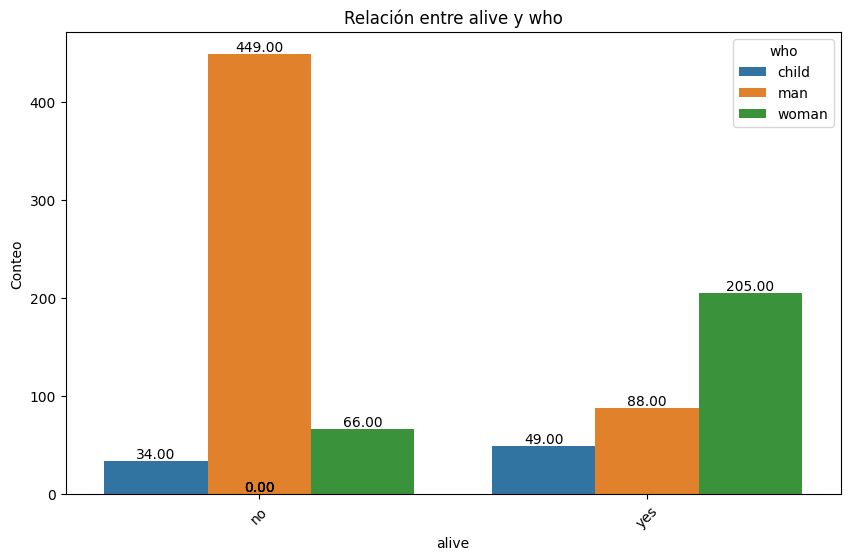

In [ ]:
plot_categorical_relationship_fin(df_titanic_1,"alive","who",relative_freq=False,show_values=True)
# valor absoluto de comparacion entre alive y who 

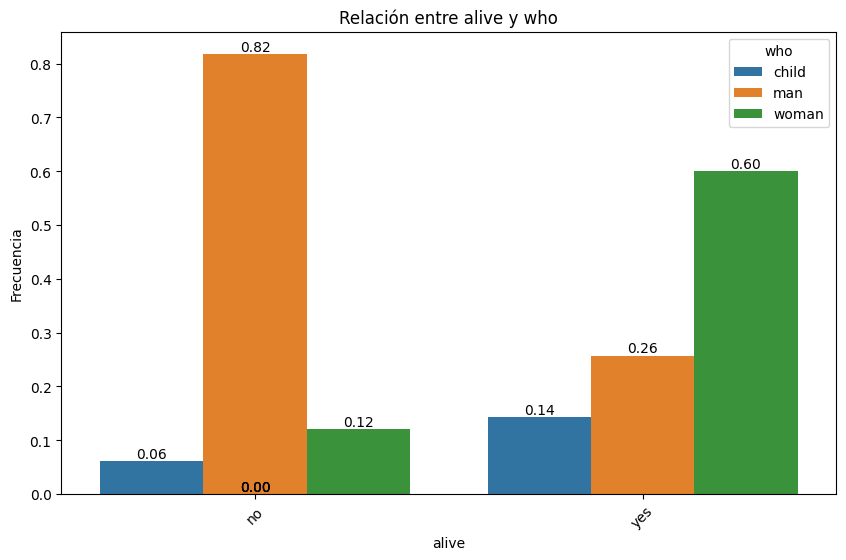

In [ ]:
plot_categorical_relationship_fin(df_titanic_1,"alive","who",relative_freq=True,show_values=True)
# valor de comparacion realtivo con alive y who ( en porcentaje %)

 `Podemos ver que an muerto mucho mas hombres que mujeres y niños` 

2. En términos absolutos, ¿de que clase sobrevivieron más pasajeros?¿ Y en términos relativos? ¿Existe alguna relación estadísticamente significativa entre la clase en la que se viajaba y la supervivencia?

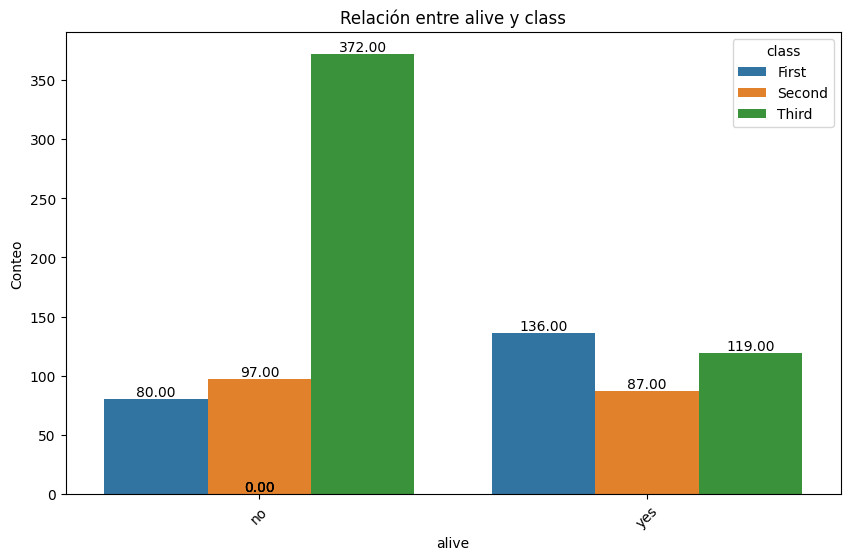

In [53]:
plot_categorical_relationship_fin(df_titanic_1,"alive","class",relative_freq=False,show_values=True)

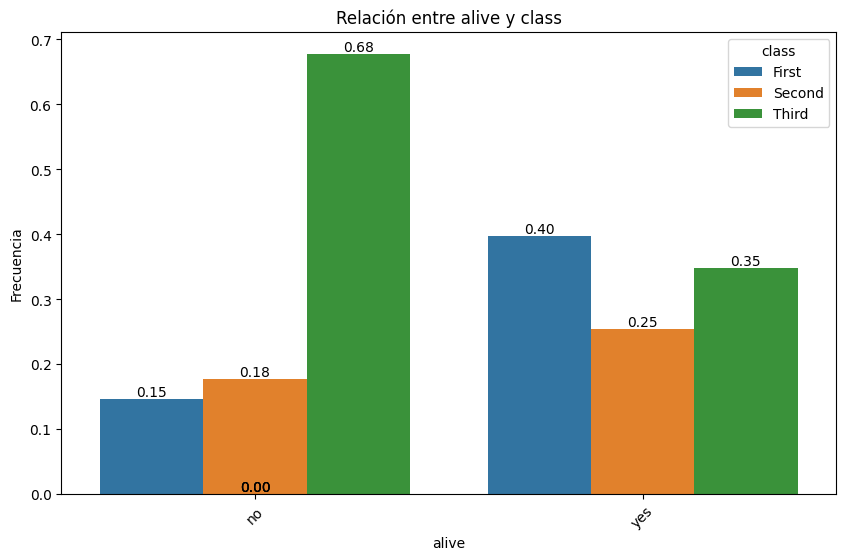

In [54]:
plot_categorical_relationship_fin(df_titanic_1,"alive","class",relative_freq=True,show_values=True)

 ` Aqui vemos que claramente la clase mas afectada fue la 3 clase y que la 1 clase fue la menos afectada`

3. ¿De qué ciudad sobrevivieron más personas?¿Y porcentualmente de que ciudad sobrevivieron más personas? ¿Hay alguna relación estadística significativa entre haber embarcado en una de las tres ciudades y haber sobrevivido o fallecido?

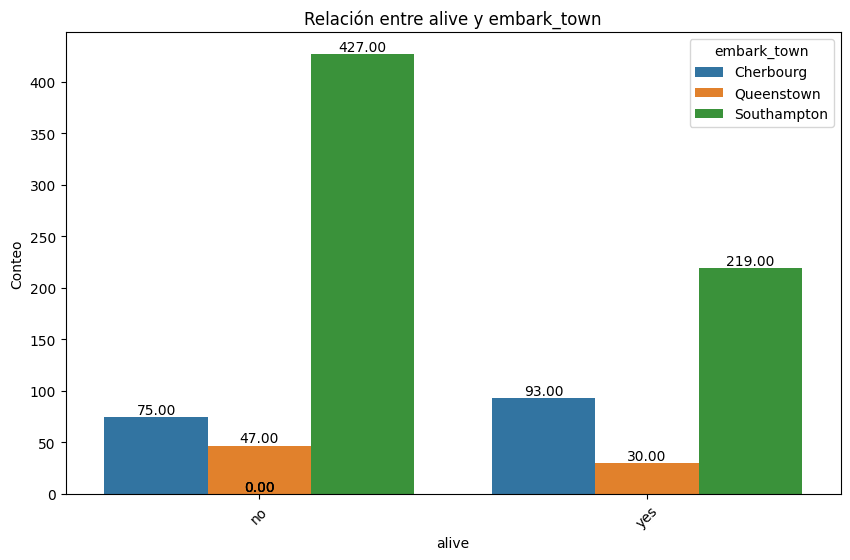

In [56]:
plot_categorical_relationship_fin(df_titanic_1,"alive","embark_town",relative_freq=False,show_values=True)

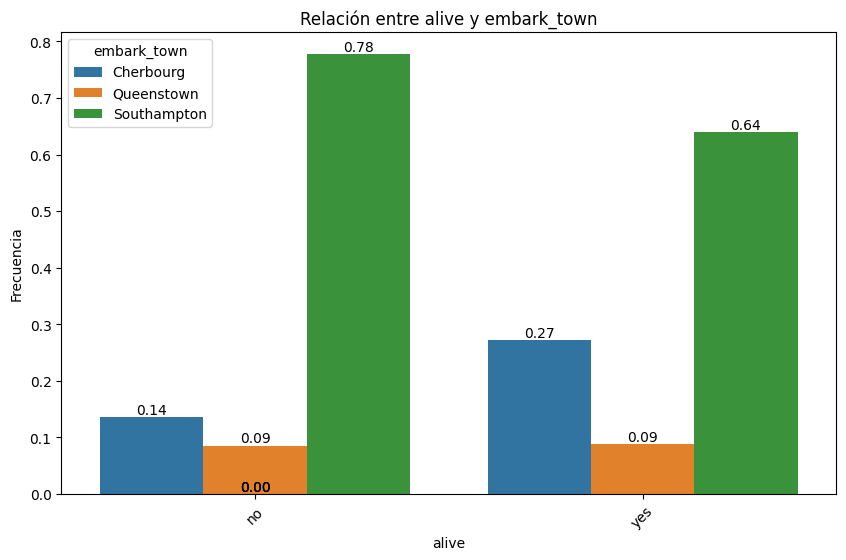

In [57]:
plot_categorical_relationship_fin(df_titanic_1,"alive","embark_town",relative_freq=True,show_values=True)

 `Aqui vemos que no hay relacion entre si siguen vivos con el lugar de embarque, lo que si vemos es que southampton fue el lugar donde mas gente embarcó`

4. ¿Qué relación hay entre el precio del pasaje y la supervivencia/fallecimiento?

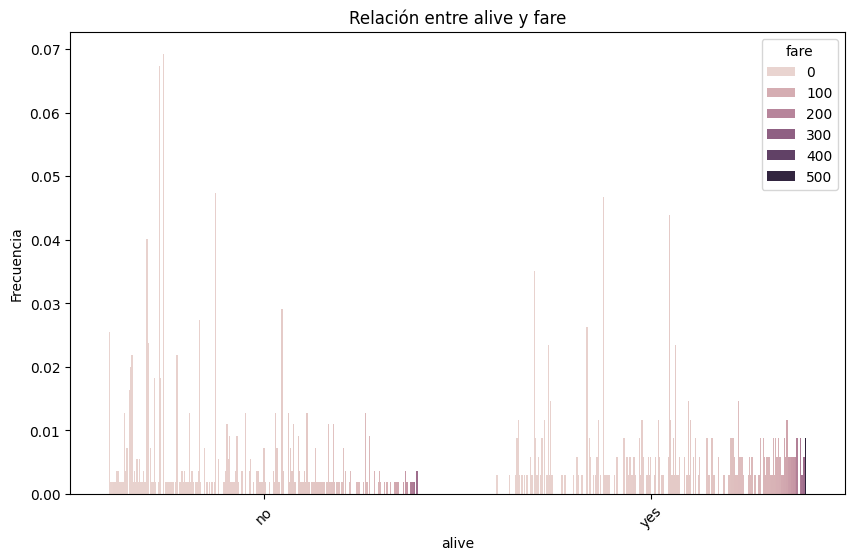

In [60]:
plot_categorical_relationship_fin(df_titanic_1,"alive","fare",relative_freq=True,show_values=False)

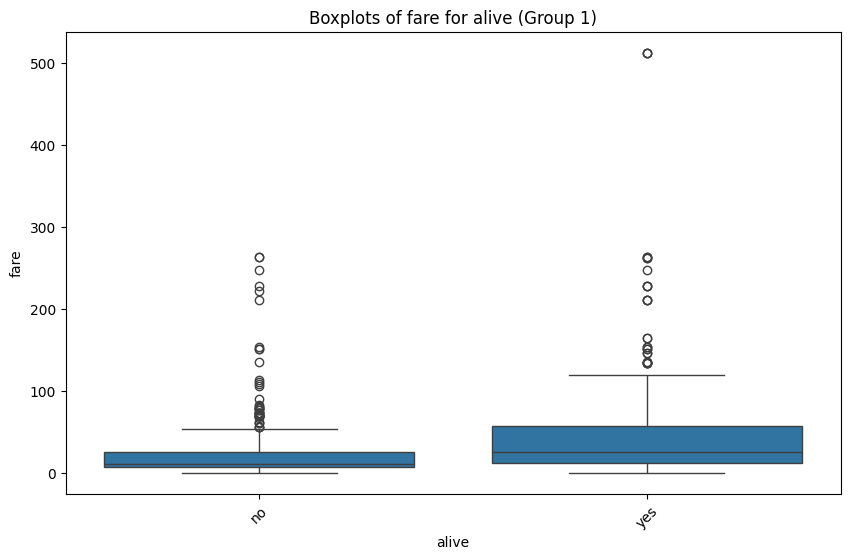

In [62]:
plot_grouped_boxplots(df_titanic_1,"alive","fare")

`podemos ver que hay una relacion entre el precio del ticket y la tasa de supervivencia` 

5. Existen pasajero que no pagaron el billete, ¿podrías explicar por qué? ¿Qué ocurrió con la persona que más dinero se dejó?

In [63]:
df_gratis = df_titanic_1["fare"]== 0

In [66]:
df_gratis.value_counts()

fare
False    876
True      15
Name: count, dtype: int64

` 15 personas viajaron gratis`

In [71]:
df_maximo = df_titanic_1["fare"].max()
print(df_maximo)

512.3292


In [75]:
masones = df_titanic_1[df_titanic_1["fare"]== df_maximo]

In [76]:
masones

,sex,age,fare,class,who,adult_male,embark_town,alive,alone,family_members
258,female,35.0,512.3292,First,woman,False,Cherbourg,yes,True,0
679,male,36.0,512.3292,First,man,True,Cherbourg,yes,False,1
737,male,35.0,512.3292,First,man,True,Cherbourg,yes,True,0


 `La persona que mas dinero se dejo iba con dos acompañantes y como no sobrevivieron`

6. Existe alguna relación entre el dinero pagado, la ciudad de embarque y la superviviencia/fallecimiento. No necesitas aplicar ningún test, muestralo numérica o visualmente.

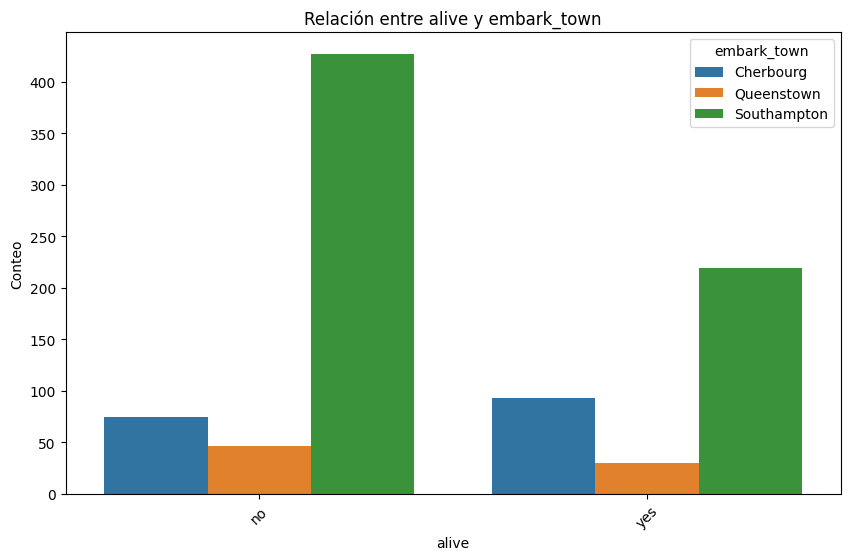

In [99]:
plot_categorical_relationship_fin(df_titanic_1,"alive","embark_town")

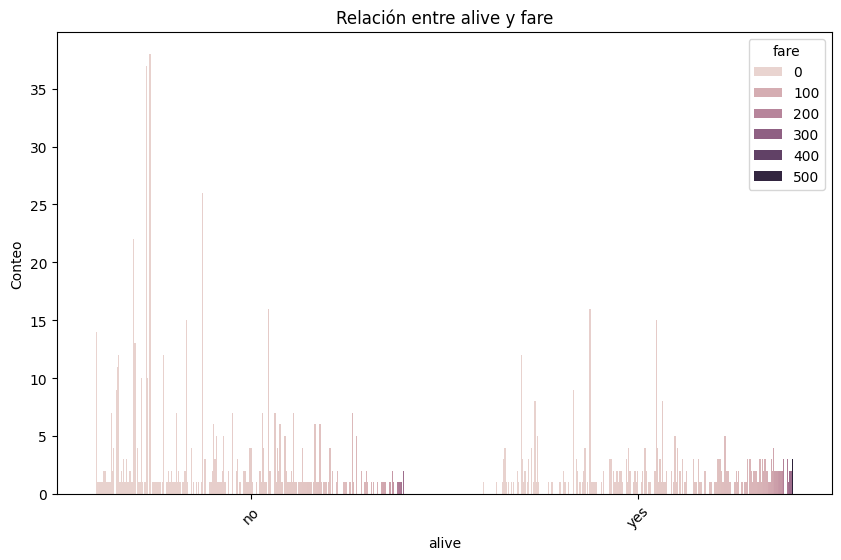

In [100]:
plot_categorical_relationship_fin(df_titanic_1,"alive","fare")

7. Ahondando en la relación entre sobrevivir o fallecer, la clase en la que se viajó y la edad de los pasajeros. ¿Qué agrupación de las dos variables (clase y edad) sobrevivió más en términos absolutos y en términos relativos?

(2,)


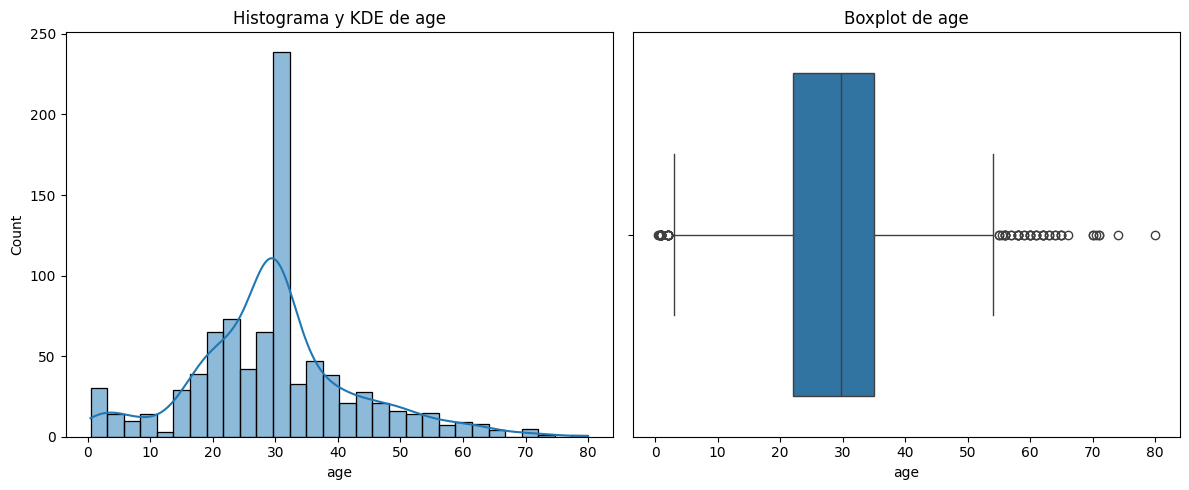

In [103]:
plot_combined_graphs(df_titanic_1,["age"])

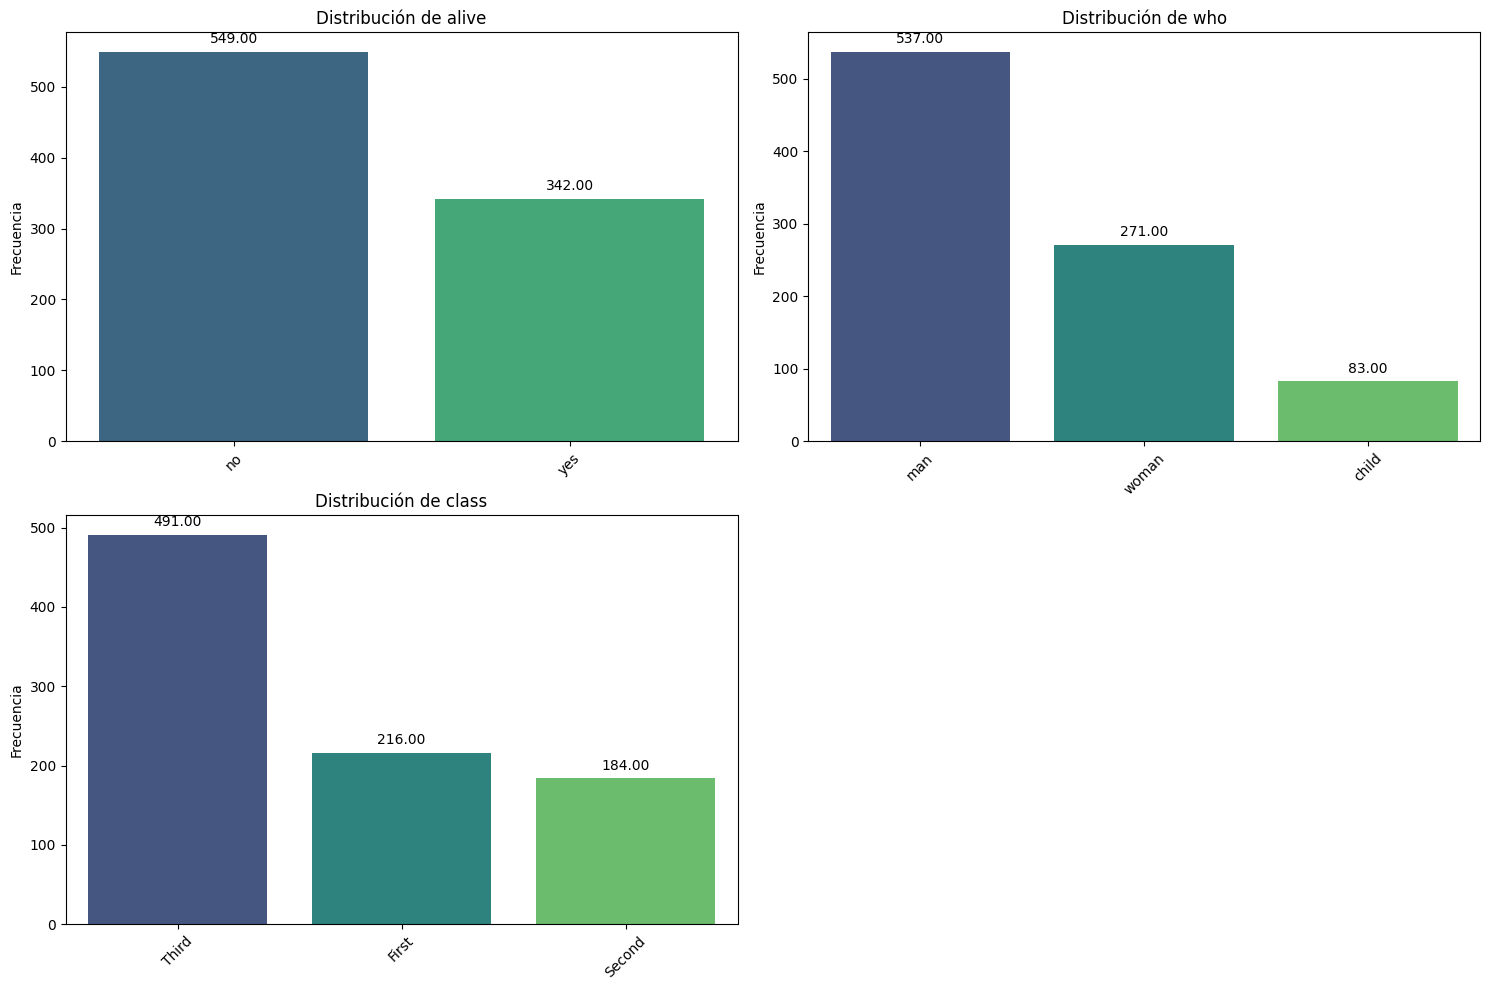

In [95]:
pinta_distribucion_categoricas(df_titanic_1,["alive","who","class"],relativa=False,mostrar_valores=True)

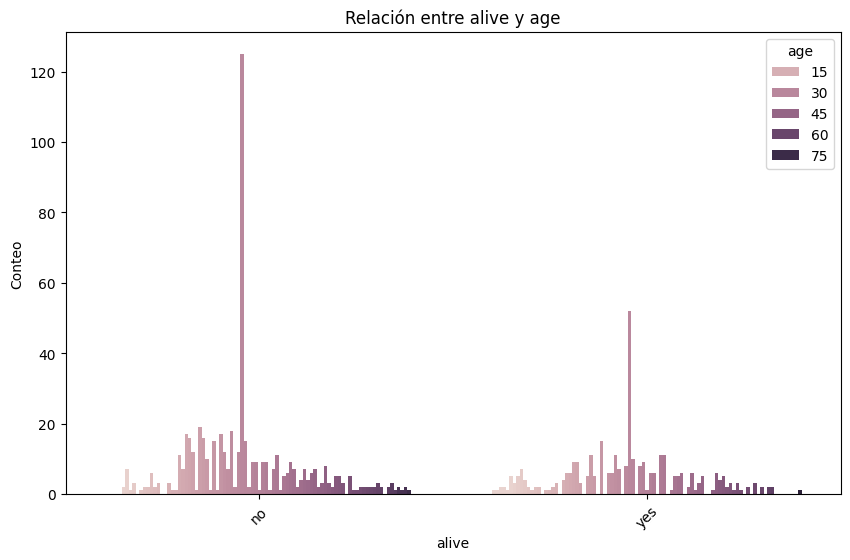

In [94]:
plot_categorical_relationship_fin(df_titanic_1,"alive","age")

8. Finalmente, muestra las posibles relaciones entre edad, coste del billete y supervivencia/fallecimiento. ¿Qué puedes decir al respecto?

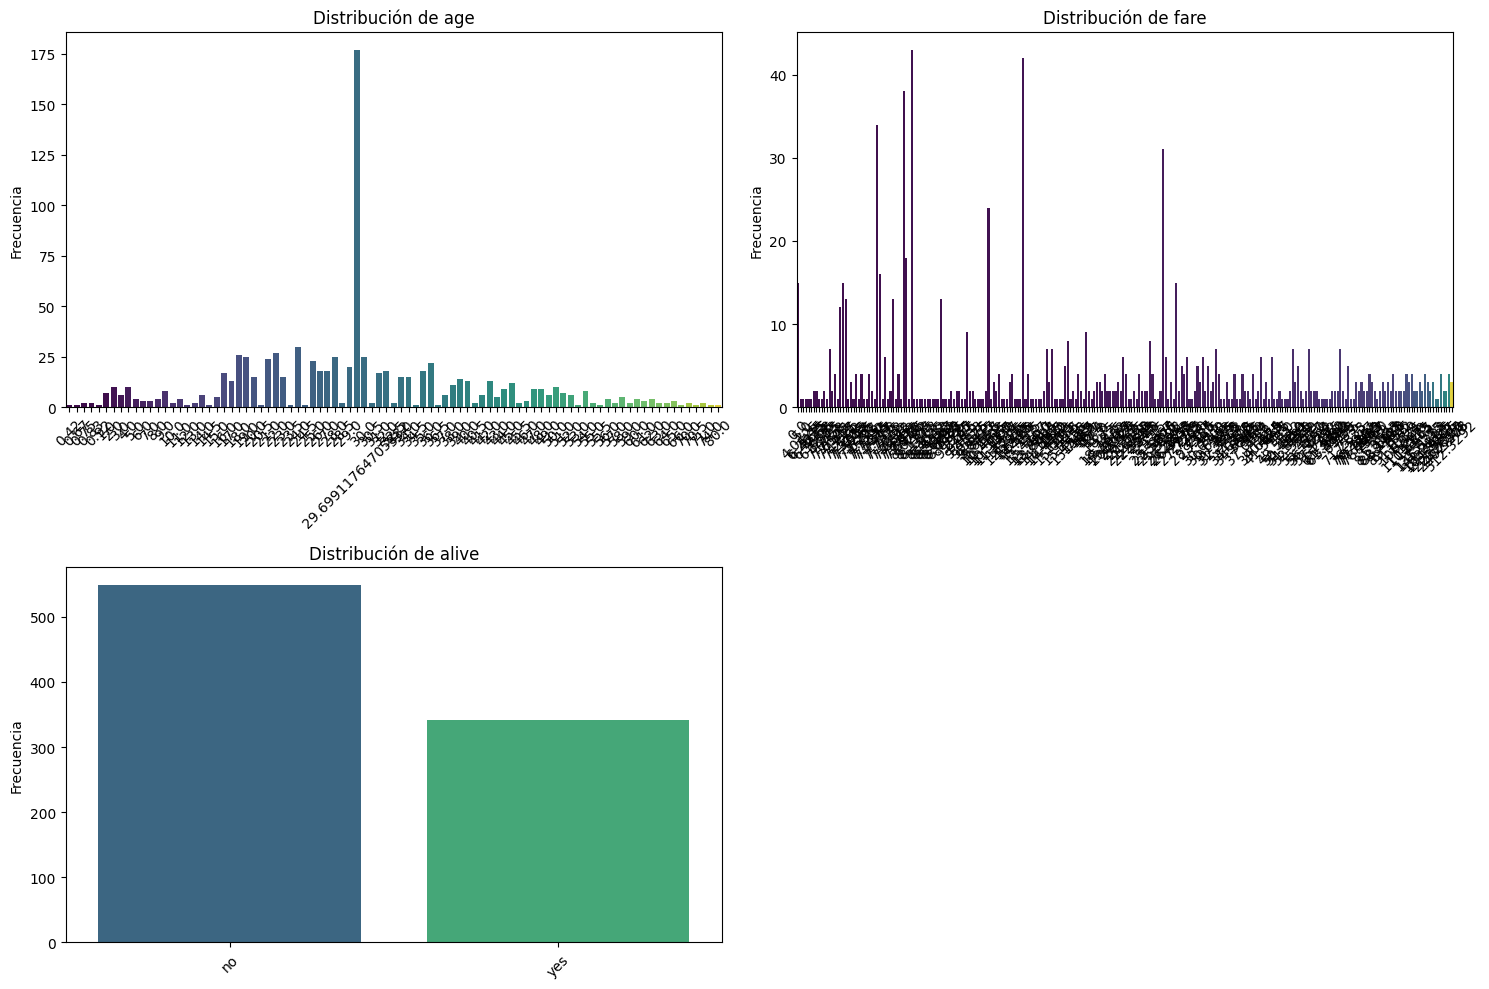

In [107]:
pinta_distribucion_categoricas(df_titanic_1,["age","fare","alive"],relativa=False,mostrar_valores=False)

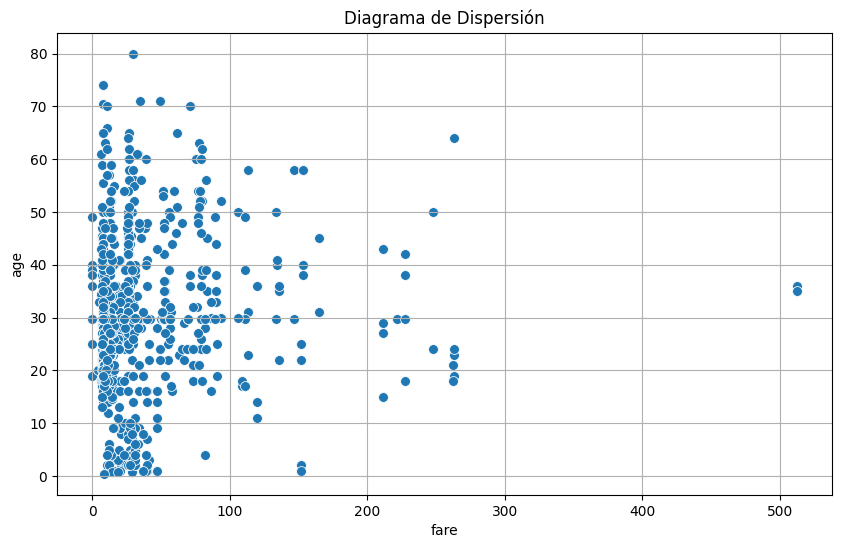

In [115]:
grafico_dispersion_con_correlacion(df_titanic_1,"fare","age",tamano_puntos=50,mostrar_correlacion=False)

In [117]:
# me quedado un poco pillado y lo dejo ahi sigo con los siguientes puntos y lo vere en la clase en vivo

## #2 Viajes

El objetivo en este caso no es tanto hacer un montón de análisis sino de completar lo que quedó pendiente en el workout y de entender cómo de un dataset podemos obtener preguntas o hipótesis interesantes (si las hay)

### #2.1 

Carga el dataset de viajes del mes de junio. Repite el análisis bivariante entre las variables "Aircompany" e "Ingresos", mostrando previamente los viajes por compañía aérea. ¿Qué situación llamativa nos surgió? (Ten en cuenta que somos el departamenteo de DataScience de TabarAir)

In [122]:
df_junio = pd.read_csv('./data/dataset_viajes_jun23.csv')
df_junio

,aircompany,origen,destino,distancia,avion,con_escala,consumo_kg,duracion,ingresos,id_vuelo,mes
0,Airnar,París,Ginebra,411,Boeing 737,False,1028.691900,51,14232.65,Air_PaGi_10737,Jun23
1,FlyQ,Bali,Roma,12738,Boeing 737,True,33479.132544,1167,468527.19,Fly_BaRo_10737,Jun23
2,TabarAir,Ginebra,Los Angeles,9103,Airbus A380,False,109439.907200,626,584789.19,Tab_GiLo_11380,Jun23
3,MoldaviAir,París,Cincinnati,6370,Boeing 737,False,17027.010000,503,233342.51,Mol_PaCi_10737,Jun23
4,TabarAir,Cincinnati,Roma,7480,Boeing 747,False,86115.744000,518,438535.07,Tab_CiRo_10747,Jun23
...,...,...,...,...,...,...,...,...,...,...,...
595,PamPangea,Bali,Londres,12553,Boeing 737,True,33310.138680,1153,442668.52,Pam_BaLo_10737,Jun23
596,Airnar,Cádiz,París,1447,Airbus A380,False,17229.139600,116,87307.63,Air_CaPa_11380,Jun23
597,Airnar,Los Angeles,Cádiz,9373,Boeing 737,False,23231.917800,731,339943.47,Air_LoCa_10737,Jun23
598,FlyQ,Barcelona,Bali,13058,Boeing 747,True,144766.211200,1070,752212.98,Fly_BaBa_10747,Jun23


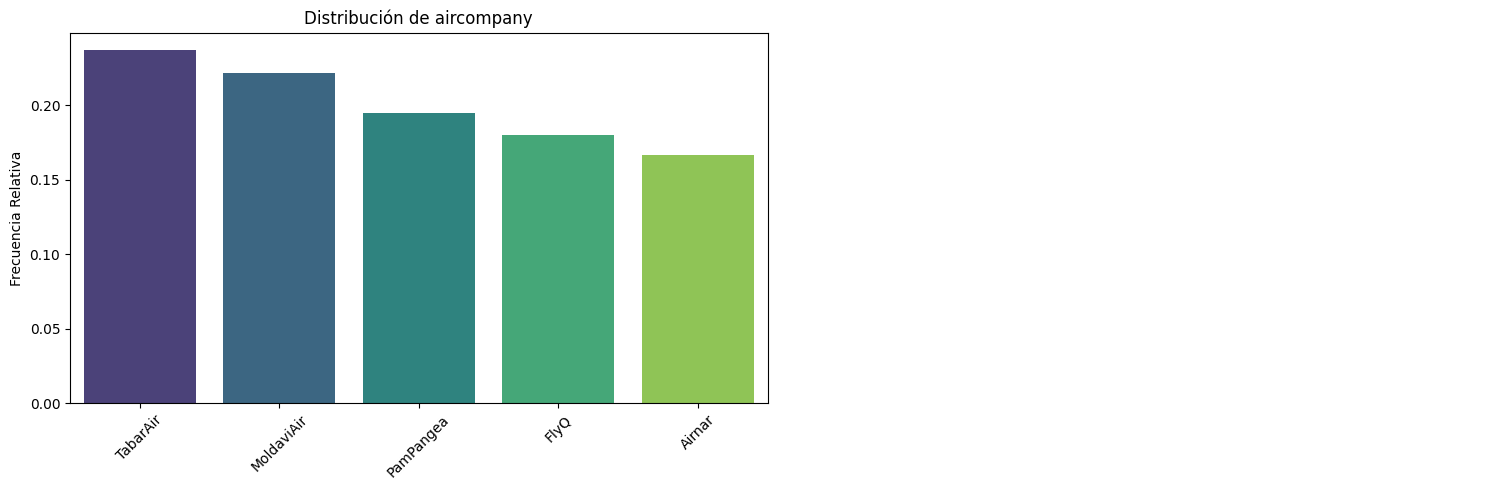

In [123]:
pinta_distribucion_categoricas(df_junio,['aircompany'],relativa=True)

(2,)


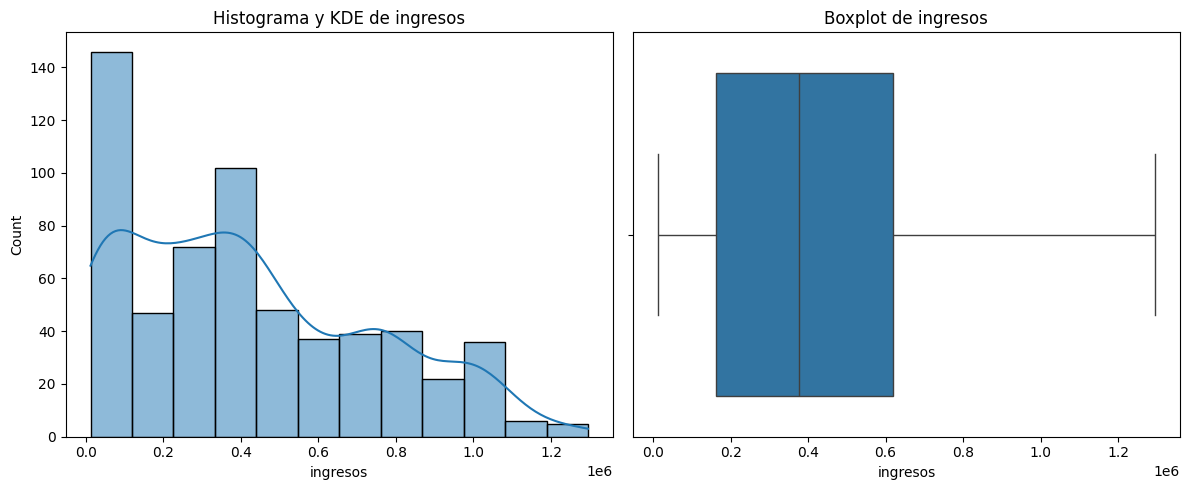

In [124]:
plot_combined_graphs(df_junio,["ingresos"])

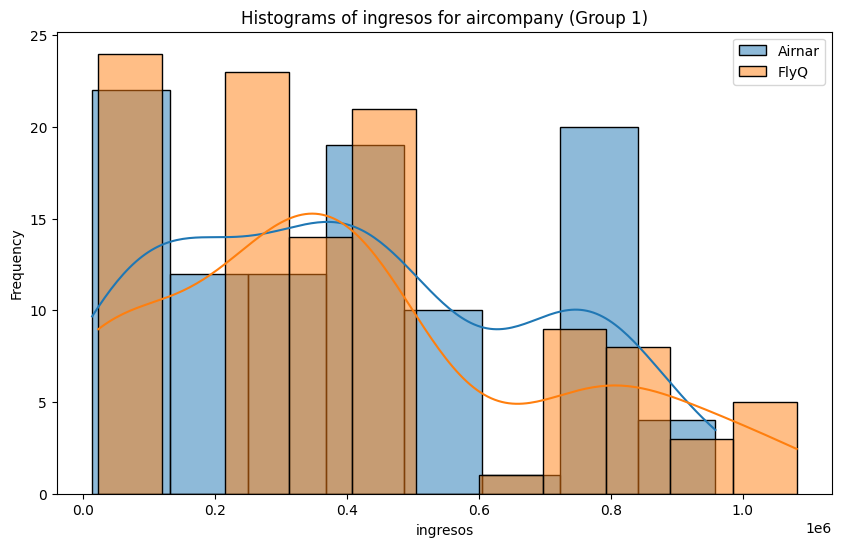

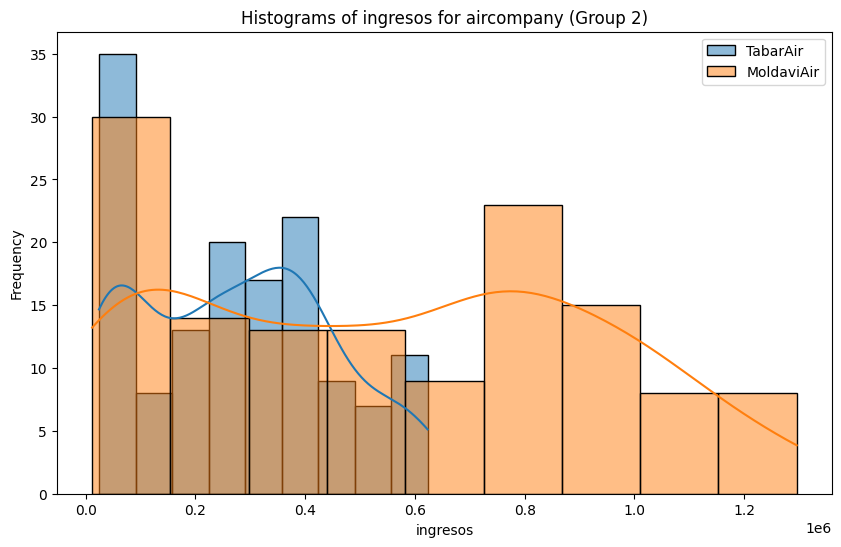

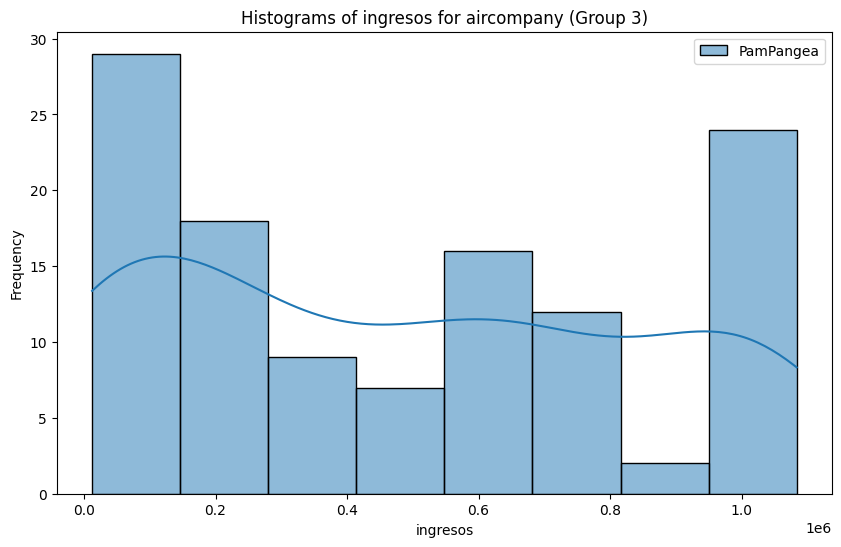

In [125]:
plot_grouped_histograms(df_junio,'aircompany','ingresos', group_size=2)

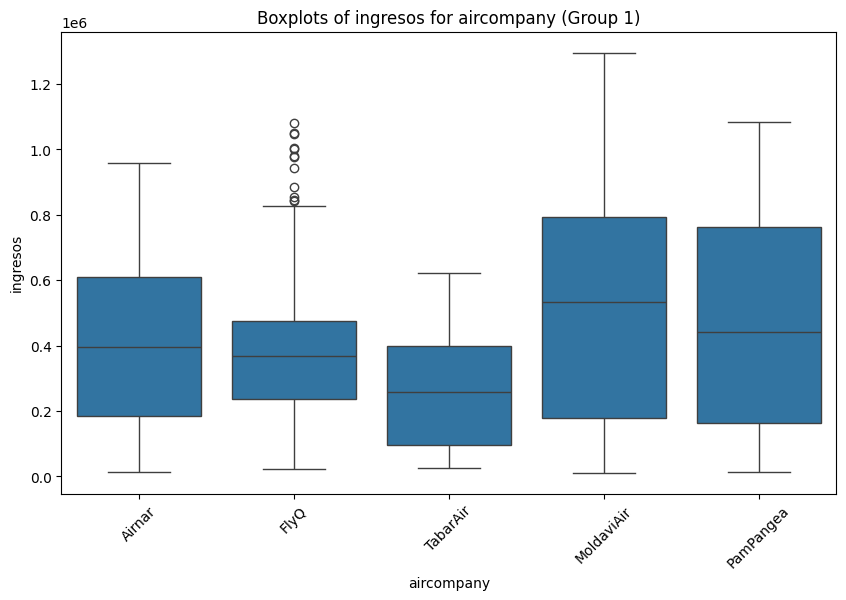

In [126]:
plot_grouped_boxplots(df_junio,'aircompany','ingresos')

### #2.2

Repite el análisis multivariante entre "ingresos","distancias" y "consumo_kg". ¿Qué veíamos que parecía también muy prometedor?

(3, 2)


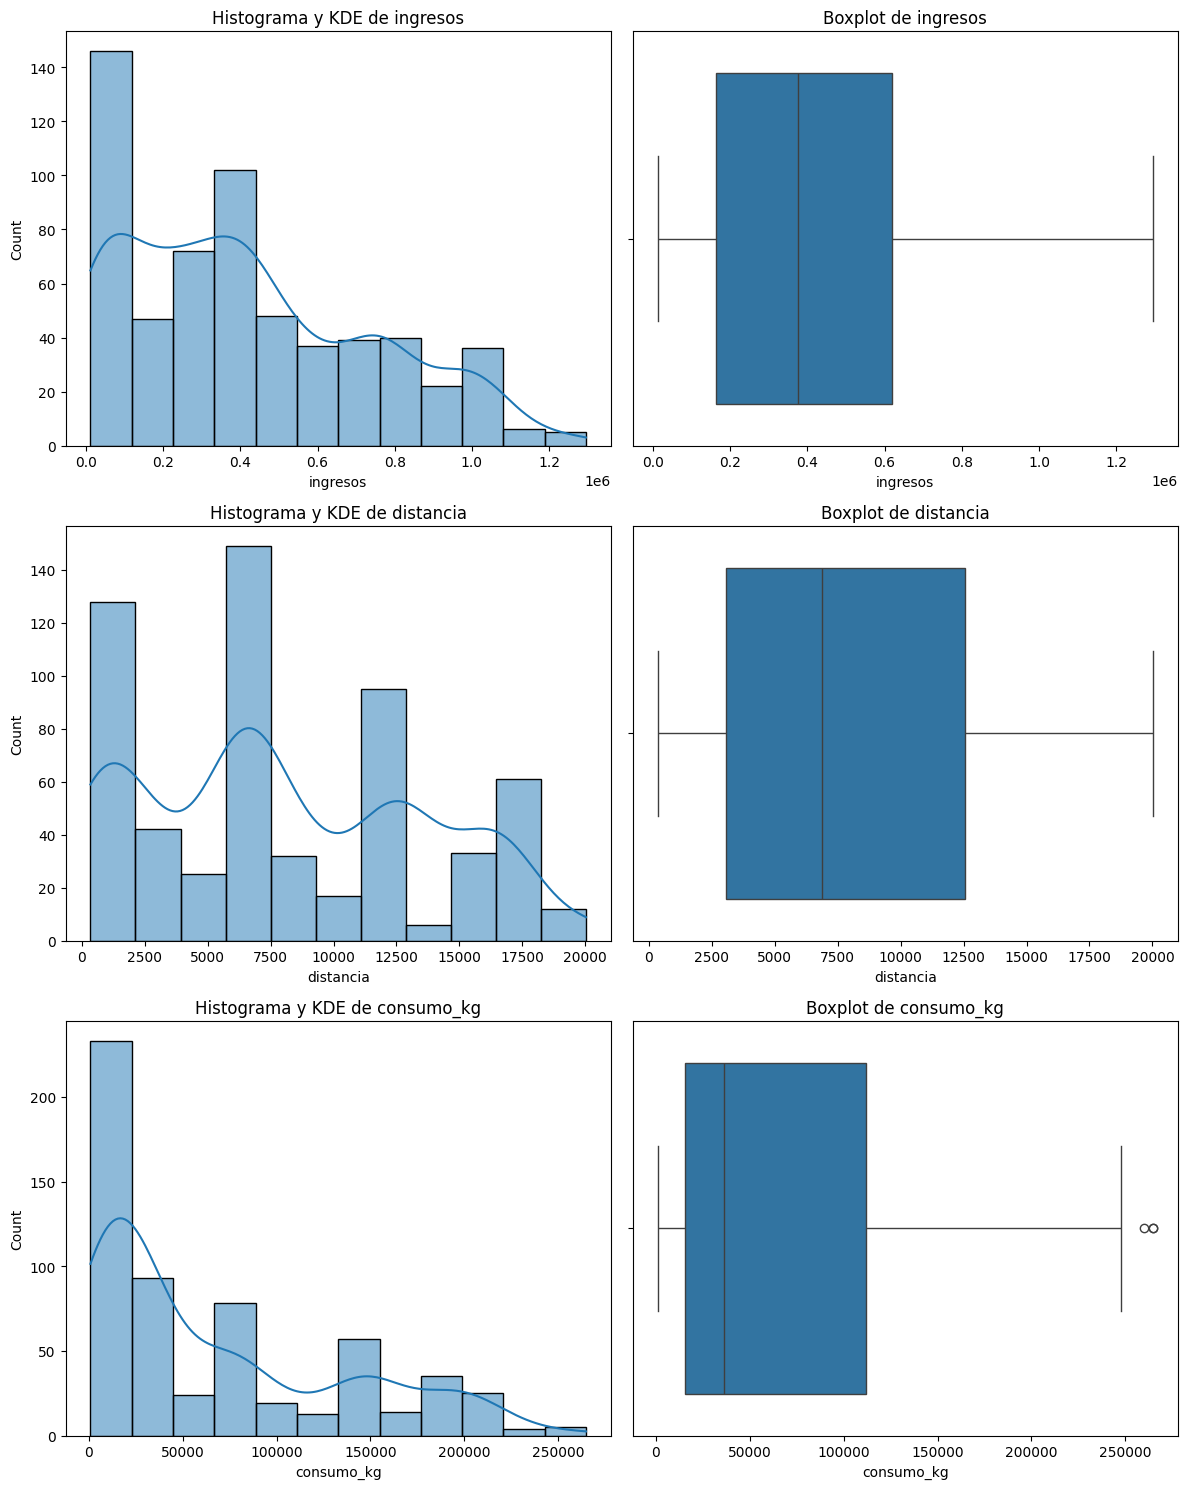

In [129]:
plot_combined_graphs(df_junio,['ingresos','distancia','consumo_kg'])

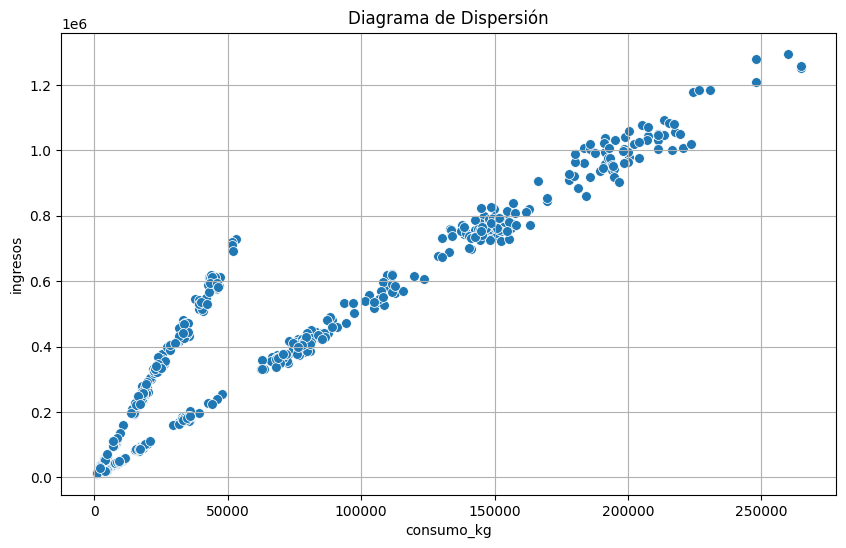

In [130]:
grafico_dispersion_con_correlacion(df_junio,'consumo_kg','ingresos')

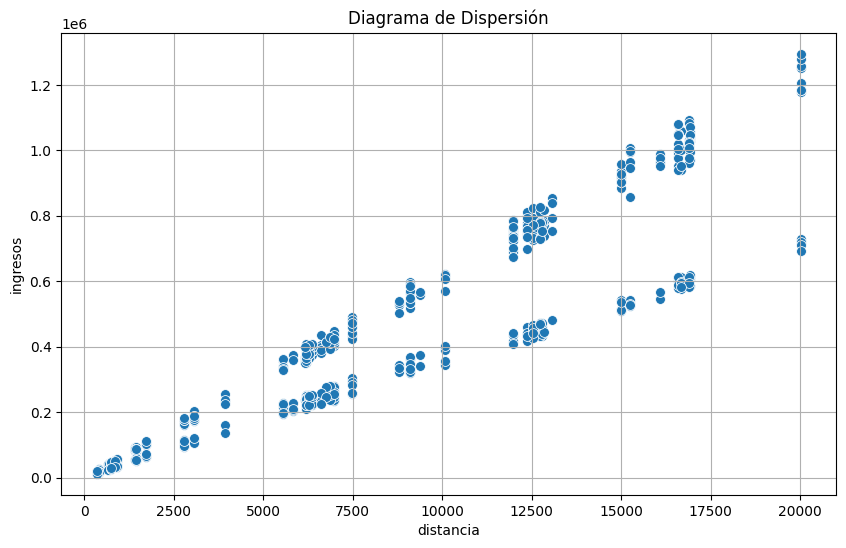

In [132]:
grafico_dispersion_con_correlacion(df_junio,'distancia','ingresos')

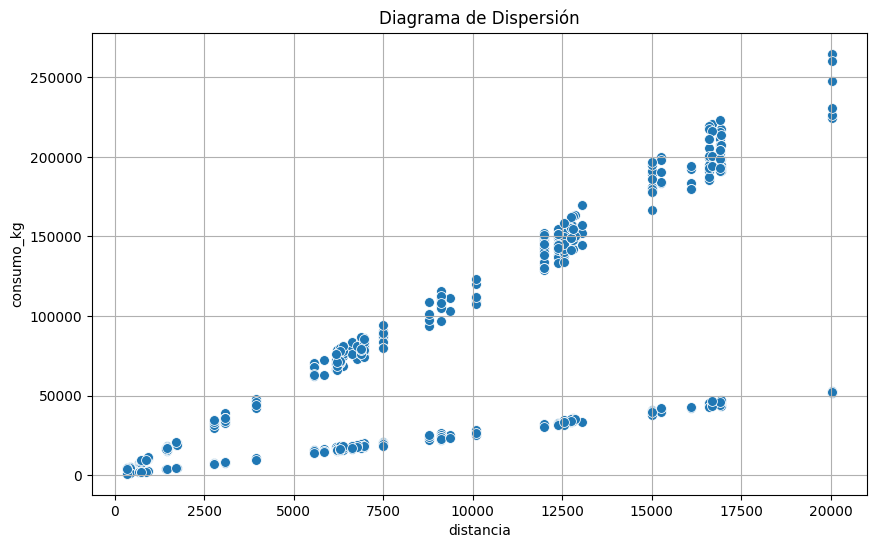

In [133]:
grafico_dispersion_con_correlacion(df_junio,'distancia','consumo_kg')

In [134]:
df_solo_numeros = df_junio.select_dtypes(include=['float','int'])
df_solo_numeros.columns

Index(['distancia', 'consumo_kg', 'duracion', 'ingresos'], dtype='object')

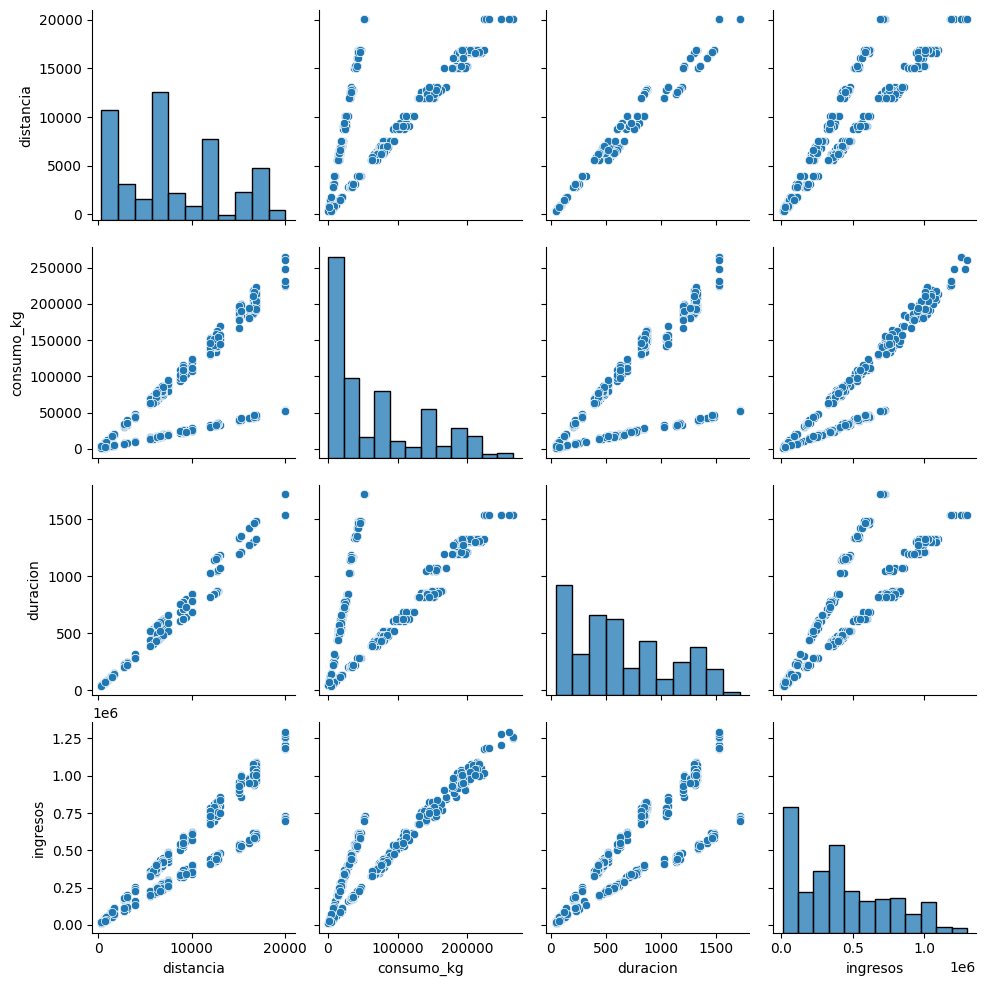

In [135]:
sns.pairplot(df_solo_numeros)

### #2.3

Crea una variable categorica "cat_vuelo" a partir de distancias, escoge los rangos de las categorías basándote en la distribución de valores de "distancia" (sugerencia entre 3 y 4 categorías). Extra: Reaiza ahora otra vez el análisis multivariante "cat_vuelo", "ingresos", "consumo_kg". ¿Ves algo diferente?

In [137]:
bins = [0, 5000, 10000, 15000, df_junio['distancia'].max()]
labels = ['Corto', 'Medio', 'Largo', 'Muy Largo']
df_junio['cat_vuelo'] = pd.cut(df_junio['distancia'], bins=bins, labels=labels)

In [139]:
df_junio.cat_vuelo

0      Corto
1      Largo
2      Medio
3      Medio
4      Medio
       ...  
595    Largo
596    Corto
597    Medio
598    Largo
599    Medio
Name: cat_vuelo, Length: 600, dtype: category
Categories (4, object): ['Corto' < 'Medio' < 'Largo' < 'Muy Largo']

### Extra:

#1 Consejos para encontrar "objetivos":

Si partes de un dataset que te parece interesante pero sin pregruntras claras, haz como hicimos con el dataset de Aviones. Describe, prioriza a ojo tus variables, realiza un análisis univariante completo, realiza un análisis bivariante ente las parejas de variables que te parecieron más intereantes. Llegados a este punto si el dataset tiene riqueza informativa, algo diferente tiene que haber aparecido (otra cosa es que sea interesante para ti :-)).  

Fíjate en lo que encontramos en el dataset de viajes: la empresa de más vuelos es la que menos ingresos tiene o la existencia clara de una línea de vuelos más eficientes en consumo que otros y otra de mayor ingresos por consumo. Lo siguiente es explorar esos puntos normalmente intentando contestar a: ¿por qué pasa?¿dónde,cuándo o cómo pasa?  

Busca esas "notas discordantes" en tu dataset, ya de por sí son mensajes del análisis. Ordénalas por importancia (importancia = impactan en ingresos, impactan en la calidad de la vida de las personas, impactan en el coste y poco más hay) e intenta entender por qué suceden esas notas discordantes, cómo solucionarlas o aprovecharlas y ya tienes objeetivos para el EDA; incluso si no encuentras respuesta siempre tendras esas notas discordantes, la conclusión de que no se puede avanzar con los datos que se tienen y los próximos pasos de encontrar más información para explicar lo que ocurre.

#2 Contestando a las preguntas de "Viajes".

- Necesitamos identificar esas líneas eficientes, para ello crea una variable que mida el ingreso por kilogramo consumido y otra que mida el kilogramo consumido por kilómetro. Haz el análisis univariante de las mismas intentando encontrar una diferencia clara entre viajes eficientes y no eficientes (que sabemos que existe). Fija un umbral para indicar si un viaje es supereficiente o si no lo es
- Crea esa variable de eficiencia binaria de eficiencia.
- Ahora haz el análisis bivariante de esa eficiencia y las compañías aéreas (queremos ver si realmente eso explica la situación de TabarAir). 
- Para nota: Hacer los análisis multivariante por compañía, eficiencia, tipo de avión y compañía, eficiencia, destino e incluso el de compañía, eficiencia, origen, destino.
- Con todo ello deberías poder encontrar si hay respuesta a la situación de TabarAir además de poder mostrar otros datos interesantes.